## Python statistics essential training - 04_05_pvaluesandconfidence

Standard imports

In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [4]:
# There is a close relationship between hypothesis testing and confidence intervals
# If the null hypothesis corresponds to a range of values for a population parameter
# that are excluded from the confidence interval, then the null hypothesis must be rejected
# with a very low p value.

# the lower p value, the higher the confidence level of the interval

In [5]:
poll = pd.read_csv('poll.csv')

In [6]:
poll.vote.value_counts(normalize=True)

Brown    0.511
Green    0.489
Name: vote, dtype: float64

In [9]:
# smapling dist
def sample(brown,n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n) < brown, 'Brown','Green')})

In [10]:
dist = pd.DataFrame({'Brown':[sample(0.50,1000).vote.value_counts(normalize=True)['Brown'] for i in range(10000)]})

<AxesSubplot:>

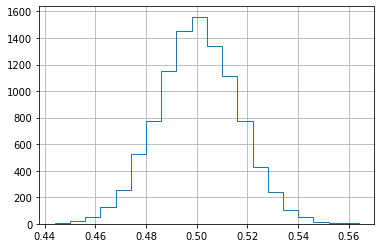

In [11]:
dist.Brown.hist(histtype='step', bins=20)

In [12]:
100 - scipy.stats.percentileofscore(dist.Brown,0.511)

24.025000000000006

In [13]:
# p value is 24%, certainly not enough to reject the null hypothesis that Green ties or wins

In [14]:
largepoll = pd.read_csv('poll-larger.csv')

In [15]:
largepoll.vote.value_counts(normalize=True)

Green    0.5181
Brown    0.4819
Name: vote, dtype: float64

In [16]:
dist = pd.DataFrame({'Green':[sample(0.50,1000).vote.value_counts(normalize=True)['Green'] for i in range(10000)]})

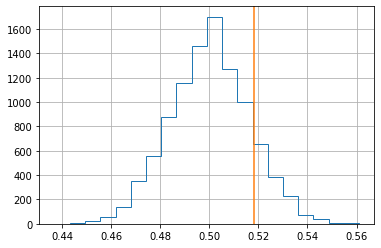

In [18]:
dist.Green.hist(histtype='step', bins = 20)
pp.axvline(0.5181, c='C1')